In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('House-Price-Prediction-clean.csv')

In [3]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [4]:
df.shape

(1460, 32)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
missing = df.isnull().sum()
missing 

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [8]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [10]:
df.nunique()

Id               1460
MSSubClass         15
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
BsmtFinSF1        637
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
GrLivArea         861
BsmtFullBath        4
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [11]:
#num_cols = df.select_dtypes(include=['int']).columns
#nd=df[num_cols]

In [12]:
correlation=df.corr()
print(correlation['SalePrice'].sort_values(ascending=False),'\n')


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
Id              -0.021917
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



<Axes: title={'center': 'Correlation of numeric feature with SalePrice'}>

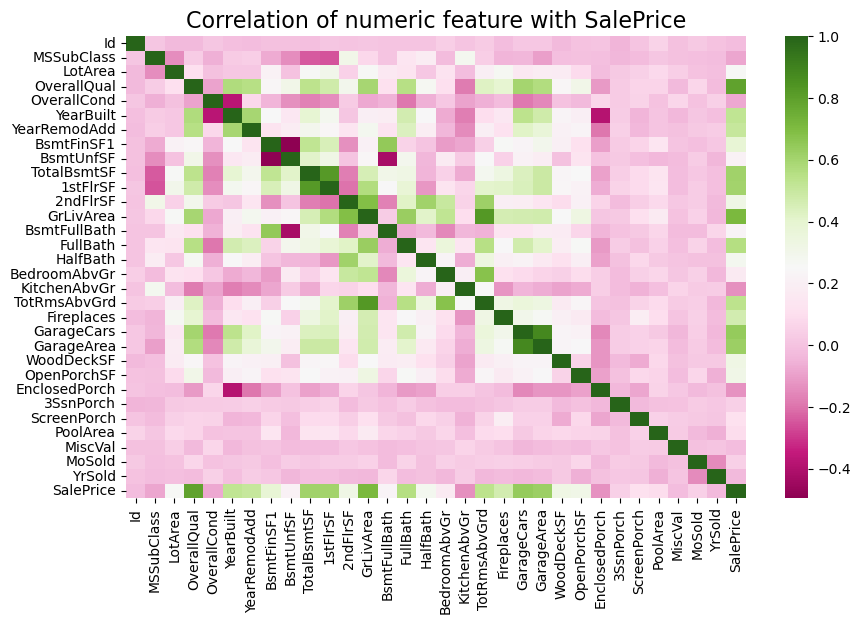

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Correlation of numeric feature with SalePrice',y=1,fontsize=16)

sns.heatmap(correlation,cmap="PiYG")

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

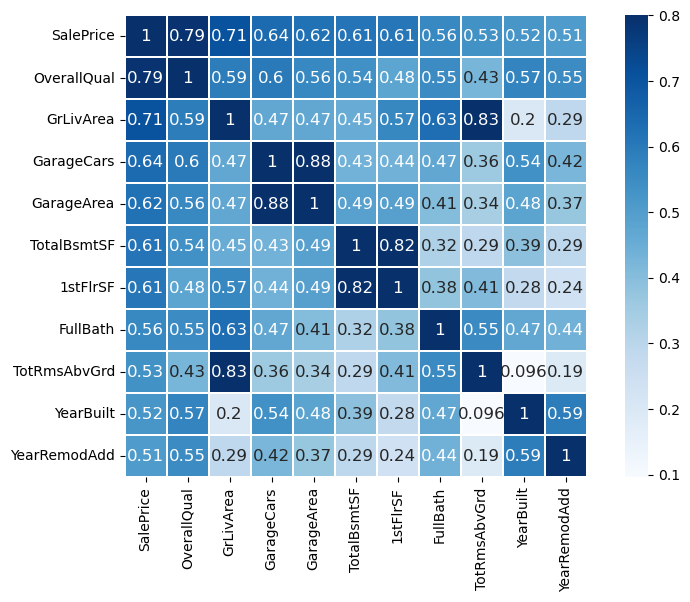

In [14]:
k = 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm , vmax =.8,linewidths=0.30,square=True,annot=True,cmap='Blues',linecolor='white',xticklabels= cols.values,
            annot_kws = {'size':12},yticklabels=cols.values)


In [15]:
cols_to_remove = ['WoodDeckSF','2ndFlrSF','OpenPorchSF' ,'HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr'    
,'ScreenPorch','PoolArea' ,'MoSold' ,'3SsnPorch','MiscVal','Id' ,'OverallCond' ,'MSSubClass','EnclosedPorch' ,'KitchenAbvGr' 
,'GarageCars','TotalBsmtSF','YrSold',]

In [16]:
data=df.drop(cols_to_remove,axis=1)
data.head()

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageArea,SalePrice
0,7,2003,2003,706,856,1710,2,8,0,548,208500
1,6,1976,1976,978,1262,1262,2,6,1,460,181500
2,7,2001,2002,486,920,1786,2,6,1,608,223500
3,7,1915,1970,216,961,1717,1,7,1,642,140000
4,8,2000,2000,655,1145,2198,2,9,1,836,250000


In [17]:
data.shape

(1460, 11)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

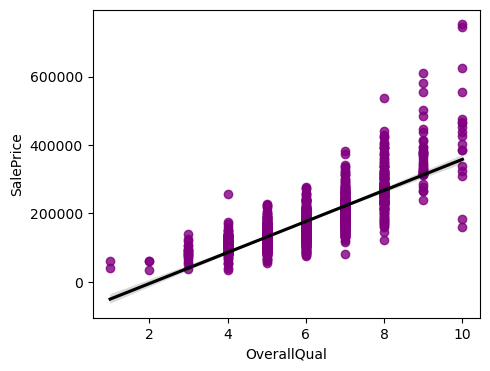

In [18]:

plt.figure(figsize=(5,4))
sns.regplot(x='OverallQual',y='SalePrice',scatter=True,fit_reg=True,data=data,scatter_kws={"color": "purple"}, 
line_kws={"color": "black"})

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

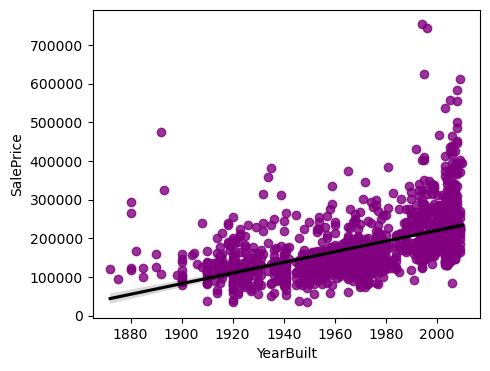

In [19]:
plt.figure(figsize=(5,4))
sns.regplot(x='YearBuilt',y='SalePrice',scatter=True,fit_reg=True,data=data,scatter_kws={"color": "purple"}, line_kws={"color": "black"})


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

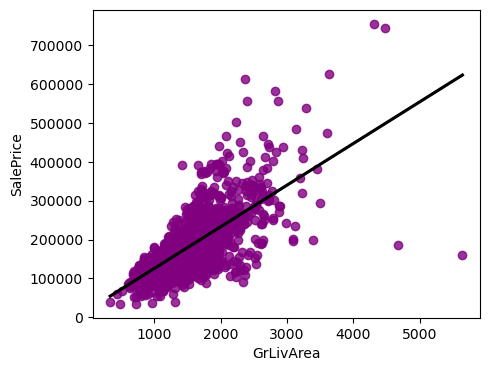

In [20]:
plt.figure(figsize=(5,4))
sns.regplot(x='GrLivArea',y='SalePrice',scatter=True,fit_reg=True,data=data,scatter_kws={"color": "purple"}, line_kws={"color": "black"},ci=None)


<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

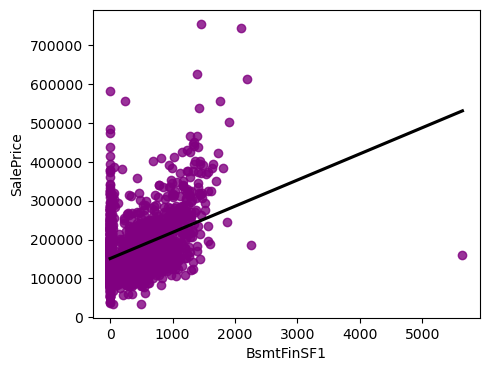

In [21]:
plt.figure(figsize=(5,4))
sns.regplot(x='BsmtFinSF1',y='SalePrice',scatter=True,fit_reg=True,data=data,scatter_kws={"color": "purple"}, line_kws={"color": "black"},ci=None)


<Axes: xlabel='GarageArea', ylabel='SalePrice'>

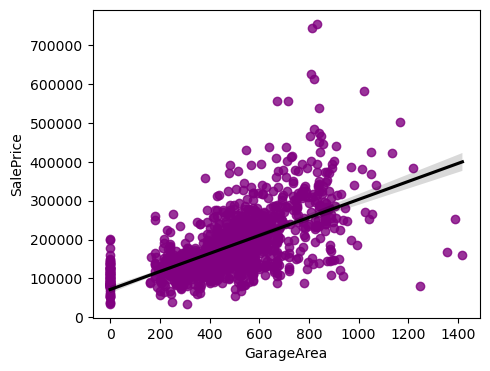

In [22]:
plt.figure(figsize=(5,4))
sns.regplot(x='GarageArea',y='SalePrice',scatter=True,fit_reg=True,data=data,scatter_kws={"color": "purple"}, line_kws={"color": "black"})


In [23]:
first_quartile = data['SalePrice'].quantile(.25)
third_quartile = data['SalePrice'].quantile(.75)
IQR = third_quartile-first_quartile
new_boundary = third_quartile+3*IQR
data.drop(data[data['SalePrice']>new_boundary].index,axis=0,inplace=True)

<Axes: xlabel='SalePrice'>

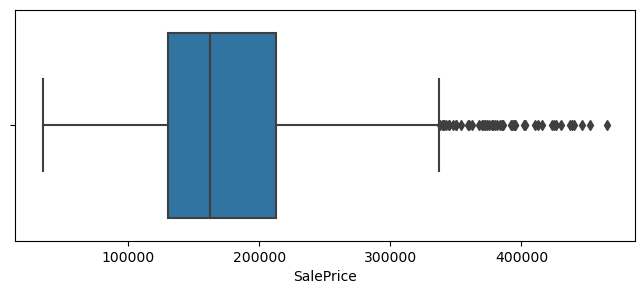

In [24]:
plt.figure(figsize=(8,3))


sns.boxplot(x=data['SalePrice'])

# Split data for training and testing 

In [25]:
X = data[['OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','1stFlrSF',
          'GrLivArea','Fireplaces','GarageArea','FullBath','TotRmsAbvGrd']]
Y= data['SalePrice']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=42)

In [27]:
print('Shape of X_train data',X_train.shape)
print('Shape of Y_train data',Y_train.shape)
print('Shape of X_test data',X_test.shape)
print('Shape of Y_test data',Y_test.shape)

Shape of X_train data (1158, 10)
Shape of Y_train data (1158,)
Shape of X_test data (290, 10)
Shape of Y_test data (290,)


# Feature Scaling

In [28]:
#load library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)


X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)



# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train.values, Y_train.values)

# Make predictions on the test data
Y_pred = lr.predict(X_test.values)


# Predictions from model

In [31]:
print("Shape of Y_pred:", Y_pred.shape)
print("Shape of Y_train:", Y_train.shape)

print("First few rows of Y_pred:", Y_pred[:5])  # Print the first 5 predictions
print("First few rows of Y_train:", Y_train[:5])

Shape of Y_pred: (290,)
Shape of Y_train: (1158,)
First few rows of Y_pred: [272684.73209404 105350.77410738 155571.20615631 200446.45416395
 114404.83374524]
First few rows of Y_train: 481     374000
1445    129000
382     213500
1100     60000
1136    119000
Name: SalePrice, dtype: int64


In [32]:
lr.intercept_

-1346998.0983175286

In [33]:
coeff_df = pd.DataFrame(lr.coef_, X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,19917.233293
YearBuilt,231.533679
YearRemodAdd,421.779228
BsmtFinSF1,16.718901
1stFlrSF,15.401965
GrLivArea,26.960066
Fireplaces,10812.593964
GarageArea,50.583226
FullBath,-3099.778994
TotRmsAbvGrd,3131.406101


# Model evaluation 

In [41]:
from sklearn.metrics import r2_score 
# Accuracy of test data
r2 = r2_score(Y_test,Y_pred)
print('R2 score',r2)

R2 score 0.7817092884188898


In [42]:
from sklearn.metrics import r2_score 
# Accuracy of test data
r2 = r2_score(Y_test,dt_Y_pred)
print('R2 score',r2)

R2 score 0.7817092884188898


In [39]:
# Accuracy of train data
train_pred = lr.predict(X_train)
r3 = r2_score(Y_train,train_pred)
r3

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7955203824965401

# Making a predictive system

# Saving the trained model 

In [36]:
import pickle
filename = 'trained_model.sav'
pickle.dump(lr,open(filename,'wb'))
# loading the saved model 
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [37]:
input_data = (6,2000,2003,456,500,1000,2,2,2,700)
#changing input data to numpy array
input_data_as_arr = np.asarray(input_data)

#reshape the array
input_data_reshape = input_data_as_arr.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshape)
print('SalePrice Prediction : ',prediction[0])

SalePrice Prediction :  2330192.3879424385
